# Q-1. Imagine you have a dataset where you have different Instagram features
like username , Caption , Hashtag , Followers , Time_Since_posted , and likes , now your task is
to predict the number of likes and Time Since posted and the rest of the features are
your input features. Now you have to build a model which can predict the
number of likes and Time Since posted.
Dataset This is the Dataset You can use this dataset for this question.

In [ ]:
# This is still work in progress. Please check question 2 first . Thnk You

In [4]:
import chardet

# Specify the file path
file_path = r'C:\documents\ineuron\Assignments\ml_question1_data\instagram_reach.csv'

# Open the file in binary mode and read a portion of it to detect the encoding
with open(file_path, 'rb') as f:
    raw_data = f.read(100000)  # Read the first 100,000 bytes or adjust as needed

# Detect the encoding of the file
result = chardet.detect(raw_data)
encoding = result['encoding']
confidence = result['confidence']

print("Detected Encoding:", encoding)
print("Confidence:", confidence)


Detected Encoding: Windows-1254
Confidence: 0.5614033456781079


In [2]:
pip install chardet

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\0002J0744\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [23]:
import chardet
import pandas as pd

# Specify the file path


# Open the file in binary mode and read a portion of it to detect the encoding
with open(file_path, 'rb') as f:
    #print(chardet.detect(f.read()))
    raw_data = f.read(100000)  # Read the first 100,000 bytes or adjust as needed

# Detect the encoding of the file
result = chardet.detect(raw_data)
encoding = result['encoding']
confidence = result['confidence']

print("Detected Encoding:", encoding)
print("Confidence:", confidence)
error =False
# Read the file using the detected encoding
try:
    data = pd.read_csv(file_path, encoding=encoding)
    print("File read successfully with detected encoding.")
    print(data.head())
except UnicodeDecodeError:
    print("Unable to read the file with the detected encoding.")
    error =True

# If unable to read the file, try different encodings manually
if error:
    print("Trying different encodings:")

    encodings_to_try = ['utf-8', 'latin1', 'cp1252']  # Add more encodings to try if needed

    for encoding in encodings_to_try:
        try:
            data = pd.read_csv(file_path, encoding=encoding, index_col=False)
            print(f"File read successfully with {encoding} encoding.")
            print(data.head())
            break
        except UnicodeDecodeError:
            print(f"Unable to read the file with {encoding} encoding.")
else:
    print("Detected encoding has sufficient confidence.")


Detected Encoding: Windows-1254
Confidence: 0.5614033456781079
Unable to read the file with the detected encoding.
Trying different encodings:
File read successfully with utf-8 encoding.
   Unnamed: 0  S.No              USERNAME  \
0           0     1         mikequindazzi   
1           1     2       drgorillapaints   
2           2     3    aitrading_official   
3           3     4  opensourcedworkplace   
4           4     5           crea.vision   

                                             Caption  Followers  \
0  Who are #DataScientist and what do they do? >>...       1600   
1  We all know where it’s going. We just have to ...        880   
2  Alexander Barinov: 4 years as CFO in multinati...        255   
3                                               sfad        340   
4  Ever missed a call while your phone was chargi...        304   

                                            Hashtags Time since posted  Likes  
0  #MachineLearning #AI #DataAnalytics #DataScien...       

In [24]:
data.head(2)

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Drop irrelevant columns
data.drop(['S.No','Unnamed: 0'], axis=1, inplace=True)
data.head(2)

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23


In [26]:

# Convert time since posted to numeric representation (e.g., hours)
data['Time since posted'] = data['Time since posted'].apply(lambda x: int(x.split()[0]) if 'hour' in x else 0)
data.head(2)


,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2,23


In [14]:
# Split the dataset into input features (X) and target variables (y)
X = data.drop(['Likes', 'Time since posted'], axis=1)
y = data[['Likes', 'Time since posted']]

# Convert categorical variables to numerical representation using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Random Forest Regressor model
model = RandomForestRegressor(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300, 250,275,10,50,75,5],
    'max_depth': [None, 5, 10,2,3,7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4,3,6,7]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Best Hyperparameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 250}
Mean Squared Error (MSE): 724.5734287311194
Mean Absolute Error (MAE): 13.44981333025829
R-squared (R2): -0.04463147271931678


### Lets Do EDA as Result is very bad

In [27]:
correlation_matrix = data.corr()
time_since_posted_correlation = correlation_matrix['Time since posted']
print(time_since_posted_correlation)


Followers            0.251154
Time since posted    1.000000
Likes                0.609888
Name: Time since posted, dtype: float64


#  Followers" has a positive correlation coefficient of 0.251154 with "Time Since Posted". This suggests a weak positive relationship between the number of followers and the time since a post was made.

## Likes" has a higher positive correlation coefficient of 0.609888 with "Time Since Posted". This indicates a stronger positive relationship between the number of likes and the time since a post was made.

## Seems "Time Since Posted" is a feature rather than dependent variable.

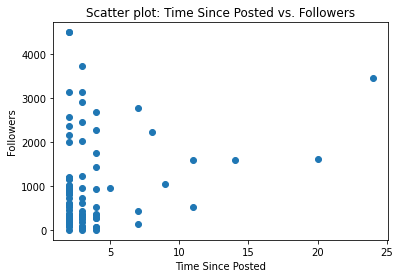

In [21]:
import matplotlib.pyplot as plt

plt.scatter(data['Time since posted'], data['Followers'])
plt.xlabel('Time Since Posted')
plt.ylabel('Followers')
plt.title('Scatter plot: Time Since Posted vs. Followers')
plt.show()

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   USERNAME           100 non-null    object
 1   Caption            94 non-null     object
 2   Followers          100 non-null    int64 
 3   Hashtags           100 non-null    object
 4   Time since posted  100 non-null    int64 
 5   Likes              100 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 4.8+ KB


In [29]:
df2 = data.copy()

In [30]:
df2=df2.dropna()

In [32]:
df2['USERNAME'].nunique()

90

In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   USERNAME           94 non-null     object
 1   Caption            94 non-null     object
 2   Followers          94 non-null     int64 
 3   Hashtags           94 non-null     object
 4   Time since posted  94 non-null     int64 
 5   Likes              94 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 5.1+ KB


In [39]:
# Prepare the data
X = df2.drop(['Likes'], axis=1)
y_likes = df2['Likes']


0     139
1      23
2      25
3      49
4      30
     ... 
95     31
96     42
97     10
98    222
99    109
Name: Likes, Length: 94, dtype: int64

90 unique username 

In [85]:
print(data['Caption'][0])


Who are #DataScientist and what do they do? >> @MikeQuindazzi >> #MachineLearning #AI #DataAnalytics #DataScienc #DataLake >> https://buff.ly/2kYmF0s


In [84]:
print(data['Hashtags'][0])

#MachineLearning #AI #DataAnalytics #DataScienc #DataLake


In [47]:
correlation_matrix = data.corr()
time_since_posted_correlation = correlation_matrix['Time since posted']
print(time_since_posted_correlation)

Followers            0.251154
Time since posted    1.000000
Likes                0.609888
Name: Time since posted, dtype: float64


In [48]:
likes_correlation = correlation_matrix['Likes']
likes_correlation

Followers            0.266218
Time since posted    0.609888
Likes                1.000000
Name: Likes, dtype: float64

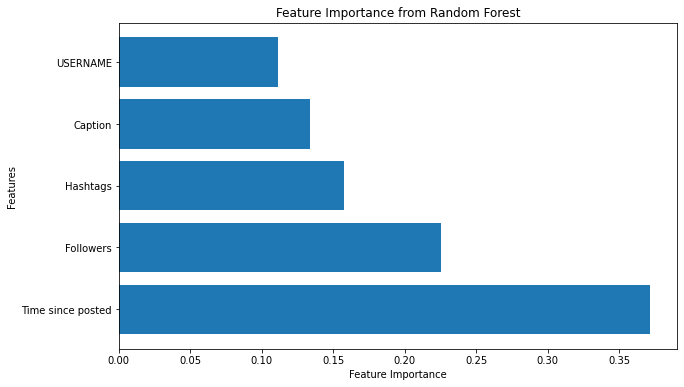

In [53]:
# Feature Importance Code

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# Prepare the data
X = data.drop(['Likes'], axis=1)
y_likes = data['Likes']

# Encode the username column using label encoding
encoder = LabelEncoder()
X['USERNAME'] = encoder.fit_transform(X['USERNAME'])
X['Caption'] = encoder.fit_transform(X['Caption'])
X['Hashtags'] = encoder.fit_transform(X['Hashtags'])


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_likes, test_size=0.2, random_state=42)

# Initialize and train the random forest regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Get the feature importances
importances = rf.feature_importances_

# Sort the feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]

# Get the feature names
feature_names = X.columns[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_importances)), sorted_importances, tick_label=feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest')
plt.show()


We can see Likes has relationship with Time Since posted and followers. This furthers tells us that Time Since posted should be features

Lets use scatterplot to visualize the same

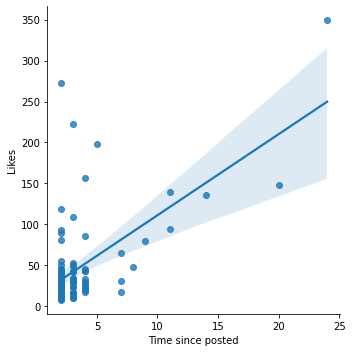

In [62]:
import seaborn as sns
sns.lmplot(x='Time since posted', y='Likes', data=data, fit_reg=True)
plt.xlabel('Time since posted')
plt.ylabel('Likes')
plt.show()

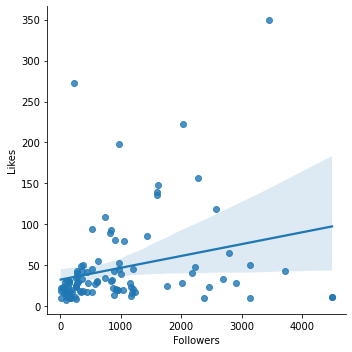

In [63]:
sns.lmplot(x='Followers', y='Likes', data=data, fit_reg=True)
plt.xlabel('Followers')
plt.ylabel('Likes')
plt.show()

In [57]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import f_classif
# Prepare the data
X = data.drop(['Likes'], axis=1)
y_likes = data['Likes']

# define feature selection
#fs = SelectKBest(score_func=f_classif, k=2)
# apply feature selection
#X_selected = fs.fit_transform(X, y)
#print(X_selected.shape)
y_likes

0     139
1      23
2      25
3      49
4      30
     ... 
95     31
96     42
97     10
98    222
99    109
Name: Likes, Length: 100, dtype: int64

In [64]:
def perform_grid_search(model, param_grid, X, y):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    #grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error')
    grid_search.fit(X, y)
    best_params = grid_search.best_params_
    return best_params


In [65]:
def plot_feature_importance(importances, feature_names, model_name):
    sorted_indices = importances.argsort()[::-1]
    sorted_importances = importances[sorted_indices]
    sorted_feature_names = feature_names[sorted_indices]

    plt.figure(figsize=(10, 6))
    plt.barh(range(len(sorted_importances)), sorted_importances, tick_label=sorted_feature_names)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title(f'Feature Importance from {model_name}')
    plt.show()

In [69]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.Installing collected packages: xgboost



You should consider upgrading via the 'C:\Users\0002J0744\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


# Preprocessing
X = data.drop(['Likes'], axis=1)
y_likes = data['Likes']

# Split the data into training and testing sets
X_train, X_test, y_train_likes, y_test_likes = train_test_split(X, y_likes, test_size=0.2, random_state=42)



In [79]:
X_train.head(2)

,Followers,Time since posted
55,3448,24
88,1158,2


In [80]:
X_test.head(2)

,Followers,Time since posted
83,91,3
53,87,4


In [78]:
# Encode the categorical feature 'USERNAME' using LabelEncoder
#encoder = LabelEncoder()


#X_train['USERNAME'] = encoder.fit_transform(X_train['USERNAME'])
#X_test['USERNAME'] = encoder.transform(X_test['USERNAME'])

#X_train['Caption'] = encoder.fit_transform(X_train['Caption'])
#X_test['Caption'] = encoder.transform(X_test['Caption'])
#X_train['Hashtags'] = encoder.fit_transform(X_train['Hashtags'])
#X_test['Hashtags'] = encoder.transform(X_test['Hashtags'])


#Removing Encoding part as this leads to below error :
#ValueError: y contains previously unseen labels: 'applewantnews' We can handle the unseen data but this may 
# affect model performance will try to handle insecond run

X = data.drop(['Likes','Caption','Hashtags','USERNAME'], axis=1)
y_likes = data['Likes']

# Split the data into training and testing sets
X_train, X_test, y_train_likes, y_test_likes = train_test_split(X, y_likes, test_size=0.2, random_state=42)

In [98]:


#Best Hyperparameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 250}
# Define hyperparameters to tune
#param_grid = {
 #   'n_estimators': [100, 200, 300, 250,275,10,50,75,5],
#    'max_depth': [None, 5, 10,2,3,7],
#    'min_samples_split': [2, 5, 10,12],
#    'min_samples_leaf': [1, 2, 4,3,6,7]
#}


# Define the parameter grid for hyperparameter tuning
param_grid_xgb = {
    #'n_estimators': [100,150,175,125,200],
    'n_estimators': [200,210,250,300],
    'max_depth': [1,2,3],
    'learning_rate': [ 0.01, .02, .05,.010]
}

param_grid_rf = {
    'n_estimators': [240],
    'max_depth': [None, 5, 10,2,3,7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4,3,6,7]
}
#param_grid_rf = {
#    'n_estimators': [250,240,245],
#    'max_depth': [1,2,3],
#    'min_samples_split': [ 10, 12,13],
#    'min_samples_leaf': [1, 2, 4]
#}

# Initialize the XGBRegressor and RandomForestRegressor
xgb = XGBRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)

# Perform hyperparameter tuning for XGBoost using GridSearchCV
best_params_xgb = perform_grid_search(xgb, param_grid_xgb, X_train, y_train_likes)
print("Best Hyperparameters for XGBoost:", best_params_xgb)

# Perform hyperparameter tuning for Random Forest using GridSearchCV
best_params_rf = perform_grid_search(rf, param_grid_rf, X_train, y_train_likes)
print("Best Hyperparameters for Random Forest:", best_params_rf)

# Initialize the XGBRegressor and RandomForestRegressor with the best hyperparameters
xgb_best = XGBRegressor(**best_params_xgb, random_state=42)
rf_best = RandomForestRegressor(**best_params_rf, random_state=42)

# Train the XGBoost model with the best hyperparameters
xgb_best.fit(X_train, y_train_likes)

# Train the Random Forest model with the best hyperparameters
rf_best.fit(X_train, y_train_likes)

# Make predictions on the test set using XGBoost
y_pred_likes_xgb = xgb_best.predict(X_test)

# Make predictions on the test set using Random Forest
y_pred_likes_rf = rf_best.predict(X_test)

Best Hyperparameters for XGBoost: {'learning_rate': 0.02, 'max_depth': 1, 'n_estimators': 210}
Best Hyperparameters for Random Forest: {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 240}


In [99]:
# Evaluate the models
mse_likes_xgb = mean_squared_error(y_test_likes, y_pred_likes_xgb)
mse_likes_rf = mean_squared_error(y_test_likes, y_pred_likes_rf)

print("MSE for XGBoost:", mse_likes_xgb)
print("MSE for Random Forest:", mse_likes_rf)



MSE for XGBoost: 630.3939052620328
MSE for Random Forest: 442.18779537363173


In [100]:
# Evaluate the model
#mse = mean_squared_error(y_test, y_pred)
mae_xgb = mean_absolute_error(y_test_likes, y_pred_likes_xgb)
mae_rf = mean_absolute_error(y_test_likes, y_pred_likes_rf)

print("MAE for XGBoost:", mae_xgb)
print("MAE for Random Forest:", mae_rf)

r2_xgb = r2_score(y_test_likes, y_pred_likes_xgb)
r2_rf = r2_score(y_test_likes, y_pred_likes_rf)

print("r2 for XGBoost:", r2_xgb)
print("r2 for Random Forest:", r2_rf)



MAE for XGBoost: 19.25466365814209
MAE for Random Forest: 16.145779662937457
r2 for XGBoost: 0.5553176661273622
r2 for Random Forest: 0.6880789943947676


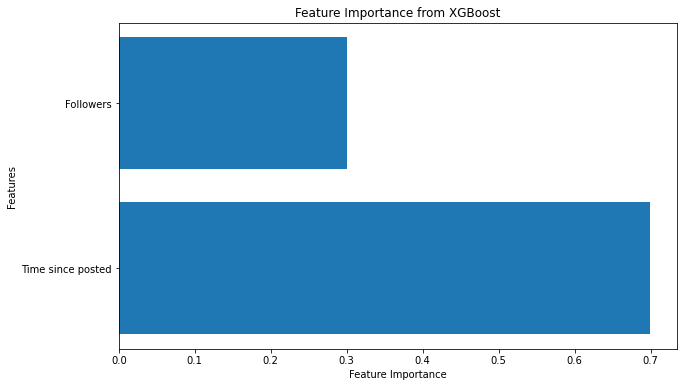

In [101]:
# Get feature importances for XGBoost
importances_xgb = xgb_best.feature_importances_
feature_names_xgb = X_train.columns

# Get feature importances for Random Forest
importances_rf = rf_best.feature_importances_
feature_names_rf = X_train.columns

# Plot feature importances
plot_feature_importance(importances_xgb, feature_names_xgb, 'XGBoost')


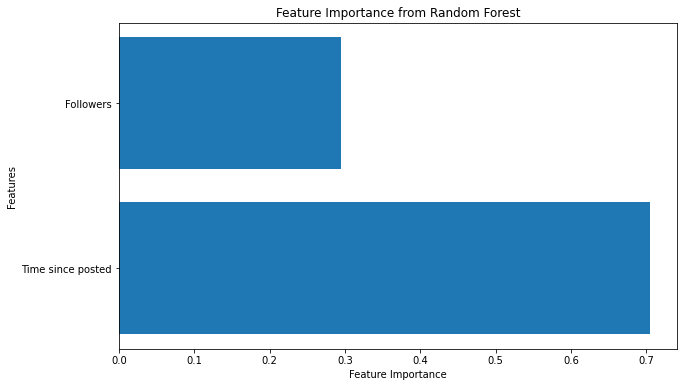

In [102]:
plot_feature_importance(importances_rf, feature_names_rf, 'Random Forest')

In [103]:
# Lets check with Linear Regression quickly



In [118]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Remove special characters from the 'Caption' column
data['Caption'] = data['Caption'].str.encode('ascii', 'ignore').str.decode('utf-8')

# Split the data into features (X) and target variable (y)
X = data.drop(['Likes'], axis=1)
y = data['Likes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical and numerical features
categorical_features = ['USERNAME', 'Hashtags']
numerical_features = ['Followers', 'Time since posted']

# Preprocess the data
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'), categorical_features)
])

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train_preprocessed, y_train)
    y_pred = model.predict(X_test_preprocessed)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"R2 Score: {r2}")
    print("--------------------")

Model: Linear Regression
MSE: 1279.6807253197944
MAE: 26.019245691345382
R2 Score: 0.09730819603894936
--------------------
Model: Random Forest
MSE: 567.8036950000001
MAE: 15.8255
R2 Score: 0.5994690459940992
--------------------


C:\Users\0002J0744\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


## Based on above experiments With OneHotEncoder I am updating the previous code

In [124]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt



# Split the data into features (X) and target variable (y)
X = data.drop(['Likes','Caption'], axis=1) # Even we can drop username also as we have seen it has not good correlation
y = data['Likes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical and numerical features
categorical_features = ['USERNAME', 'Hashtags']
numerical_features = ['Followers', 'Time since posted']

# Preprocess the data
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'), categorical_features)
])

# Fit and transform the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Define the parameter grid for hyperparameter tuning
param_grid_xgb = {
    #'n_estimators': [100,150,175,125,200],
    'n_estimators': [200,210,250,300],
    'max_depth': [1,2,3],
    'learning_rate': [ 0.01, .02, .05,.010]
}

param_grid_rf = {
    'n_estimators': [240],
    'max_depth': [None, 5, 10,2,3,7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4,3,6,7]
}

# Define models and their respective parameter grids
models = {
    'Random Forest': (RandomForestRegressor(), param_grid_rf),
    'XGBoost': (XGBRegressor(), param_grid_xgb)
}


# Initialize the XGBRegressor and RandomForestRegressor with the best hyperparameters
xgb_best = XGBRegressor(**best_params_xgb, random_state=42)
rf_best = RandomForestRegressor(**best_params_rf, random_state=42)


# Train and evaluate models
for model_name, (model, param_grid) in models.items():
    best_param = perform_grid_search(model, param_grid,X_train_preprocessed,y_train)
    if model_name == 'Random Forest':        
        best_model = RandomForestRegressor(**best_param, random_state=42)    
    else:
        best_model = XGBRegressor(**best_param, random_state=42)
    
    # Train the model with the best hyperparameters
    best_model.fit(X_train_preprocessed, y_train)
    y_pred = best_model.predict(X_test_preprocessed)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"R2 Score: {r2}")
    print("--------------------")


C:\Users\0002J0744\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Model: Random Forest
MSE: 441.56514069192065
MAE: 15.995718243968298
R2 Score: 0.6885182174499855
--------------------
Model: XGBoost
MSE: 751.2589807986085
MAE: 21.784113121032714
R2 Score: 0.47005896767761035
--------------------
